# Computational Science Project Aerodynamics graphs

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def graph(data, xaxis, yaxis, shape=None):
    
    if shape:
        plot_data = data.loc[data['shape'] == shape]
        label = shape
    else:
        plot_data = data
        label = None
        
    plt.plot(plot_data[xaxis], plot_data[yaxis], shape_style_map[label], label=label)

styles = ['v-', 'o-', '^-', 's-', '>-', 'x-']
all_shapes = ['triangle', 'rect', 'halfcircle', 'moon', 'bullet', 'circle']
shape_style_map = dict(zip(all_shapes, styles))
shape_style_map[None] = 'x-'

### Shape parameters analysis

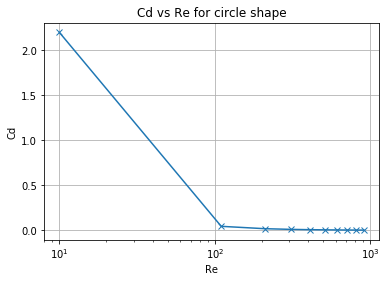

In [29]:
# Looking for best and stable Reynoldsnumber
circle_data = pd.read_csv("results/circle_reynolds.txt", sep=" ", header=0)
circle_data.columns = ["Re", "Cd", "Cl"]

graph(circle_data, 'Re', 'Cd')

plt.xlabel("Re")
plt.ylabel("Cd")
plt.xscale('log')  # Logaritmic xscale
#plt.yscale('log')  # Logaritmic yscale
plt.title("Cd vs Re for circle shape")
plt.grid()
plt.savefig('fig_cd_vs_Re.pdf')
plt.show()

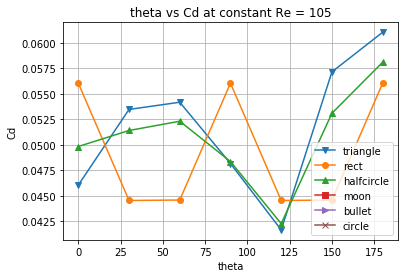

In [30]:
# Data for reynolds number
data = pd.read_csv("results/theta.txt", sep=" ", header=0)
data.columns = ["shape","theta", "Cd", "Cl"]

x = "theta"
y = "Cd"

for shape in all_shapes:
    graph(data, x, y, shape=shape)

plt.xlabel(x)
plt.ylabel(y)
plt.title("{x} vs {y} at constant Re = 105".format(x=x, y=y))

plt.legend()
plt.grid()
plt.savefig('fig_theta_vs_Cd.pdf')
plt.show()

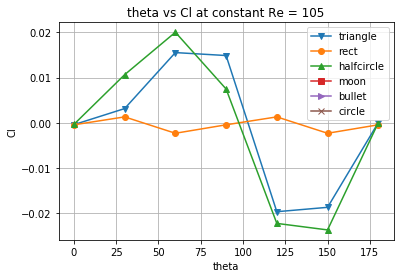

In [31]:
x = "theta"
y = "Cl"

for shape in all_shapes:
    graph(data, x, y, shape=shape)

    
plt.xlabel(x)
plt.ylabel(y)
plt.title("{x} vs {y} at constant Re = 105".format(x=x, y=y))
plt.legend()
plt.grid()
plt.savefig('fig_theta_vs_Cl.pdf')
plt.show()

In [32]:
# Look for the best shape specs.
best_ratio = 0
best_specs = None

for i in range(len(data)):
    coefficients_ratio = abs(float(data['Cl'][i]) / float(data['Cd'][i]))
    if coefficients_ratio > best_ratio:
        best_specs = i
        best_ratio = coefficients_ratio 

print("Best specs are \n{}, with Cl/Cd of {}".format(data.loc[best_specs], best_ratio))

Best specs are 
shape    halfcircle
theta           120
Cd        0.0422649
Cl       -0.0222654
Name: 11, dtype: object, with Cl/Cd of 0.5268065820047454


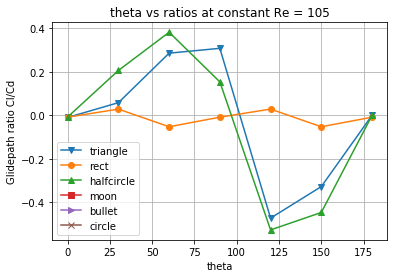

In [33]:
# Looking for best Cl/Cd ratio
ratios = []
for i in range(len(data)):
    coefficients_ratio = float(data['Cl'][i]) / float(data['Cd'][i])
    ratios.append(coefficients_ratio)
data['ratios'] = ratios

for shape in all_shapes:
    graph(data, "theta", "ratios", shape=shape)

plt.title("theta vs ratios at constant Re = 105")
plt.xlabel('theta')
plt.ylabel("Glidepath ratio Cl/Cd")
plt.legend()
plt.grid()
plt.savefig('fig_theta_vs_ratios.pdf')
plt.show()

### Different Re values 

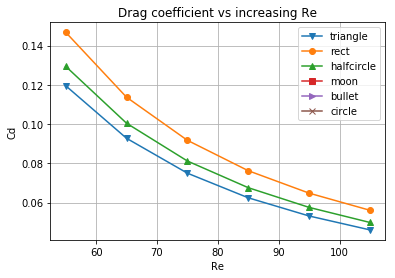

In [34]:
rdata = pd.read_csv('results/reynolds.txt', sep=" ", header=0)
rdata.columns = ["shape", "Re", "Cd", "Cl"]

for shape in all_shapes:
    graph(rdata, 'Re', 'Cd', shape=shape)

plt.legend()
plt.xlabel("Re")
plt.ylabel("Cd")
plt.title("Drag coefficient vs increasing Re")
plt.grid()
plt.savefig('fig_cd_vs_Re_all.pdf')
plt.show()

### Increasing velocity of wind tunnel

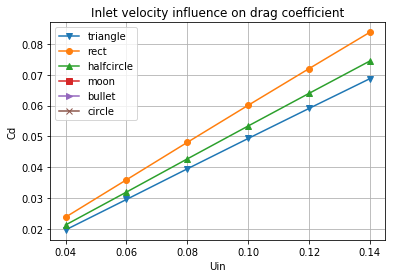

In [35]:
velocity_data = pd.read_csv("results/velocity.txt", sep=" ", header=0)
velocity_data.columns = ["shape","Uin", "Cd", "Cl"]

for shape in all_shapes:
    graph(velocity_data, "Uin", "Cd", shape=shape)

plt.xlabel('Uin')
plt.ylabel('Cd')
plt.legend()
plt.title("Inlet velocity influence on drag coefficient")
plt.grid()
plt.savefig('fig_Uin_vs_Cd.pdf')
plt.show()

### Increasing shape volume

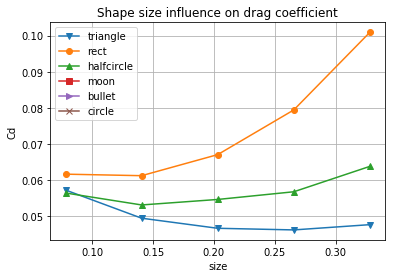

In [36]:
size_data = pd.read_csv("results/size.txt", sep=" ", header=0)
size_data.columns = ["shape","size", "Cd", "Cl"]

for shape in all_shapes:
    graph(size_data, "size", "Cd", shape=shape)

plt.xlabel('size')
plt.ylabel('Cd')
plt.legend()
plt.title("Shape size influence on drag coefficient")
plt.grid()
plt.savefig('fig_size_vs_Cd.pdf')
plt.show()